<a href="https://colab.research.google.com/github/kellybianca/DPI/blob/main/exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Questao 1

##### Gere uma imagem 640x480 contendo níveis de cinza aleatórios com distribuição de probabilidade normal com média 128 e desvio padrão 20. Utilize semente aleatória padrão igual a 0 (zero).

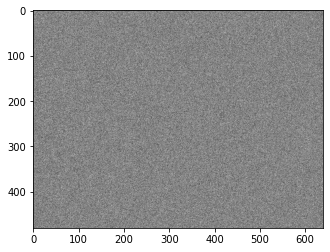

In [ ]:
import numpy as np

img = np.ones((480, 640), dtype=np.uint8)
cv2.setRNGSeed(0)
cv2.randn(img, 128, 20)

plt.imshow(img, cmap='gray')
plt.show()

##### Leia a imagem "septagon.tif", crie e adicione ruído do tipo sal e pimenta a esta imagem. Salve o resultado.

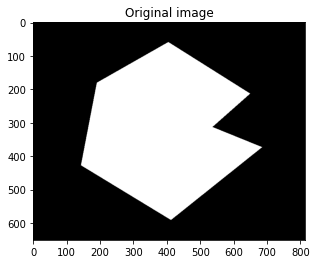

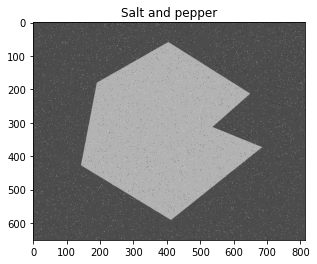

In [ ]:
import random
import cv2
import matplotlib.pyplot as plt

def add_noise(img):
	row , col = img.shape
	
	number_of_pixels = random.randint(100, 10000)
	for i in range(number_of_pixels):
		y=random.randint(0, row - 1)
		x=random.randint(0, col - 1)
		img[y][x] = 255

	number_of_pixels = random.randint(100 , 10000)
	for i in range(number_of_pixels):
		y=random.randint(0, row - 1)
		x=random.randint(0, col - 1)
		img[y][x] = 0
		
	return img

img = cv2.imread('septagon.tif',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title("Original image")
plt.show()
salt_pepper = add_noise(img)
plt.imshow(salt_pepper, cmap="gray")
plt.title('Salt and pepper')
plt.show()

##### Carregue a imagem "hsv_disk.png" e a converta para escala de cinza. Salve o resultado.

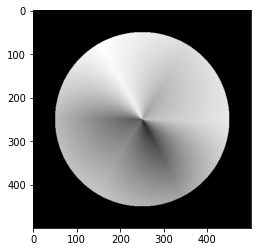

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage import color

img = cv.imread('hsv_disk.png',0)

new_color = color.rgb2gray(img)    
plt.imshow(new_color, cmap='gray')
plt.show()

##### Carregue a imagem "septagon.tif" e aplique um limiar (threshold) a esta imagem buscando segmentar o objeto do background. Salve o resultado.

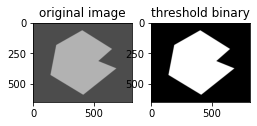

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('septagon.tif',0)

ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

titles = ['Original Image','BINARY']
images = [img, thresh1]

plt.subplot(2,3,1),plt.imshow(img,'gray',vmin=0,vmax=255)
plt.title('original image')

plt.subplot(2,3,2),plt.imshow(thresh1,'gray',vmin=0,vmax=255)
plt.title('threshold binary')

plt.show()

### Questão 2


##### Carregue a imagem "pollen.tif", mostre o seu histograma, aplique uma equalização e apresente a imagem equalizada e o novo histograma. Salve o resultado da imagem com contraste aprimorado.

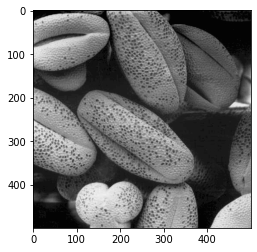

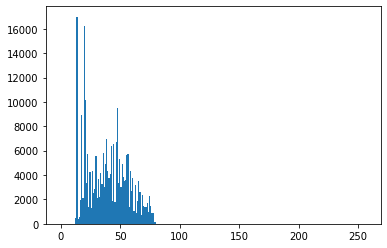

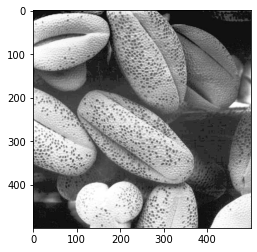

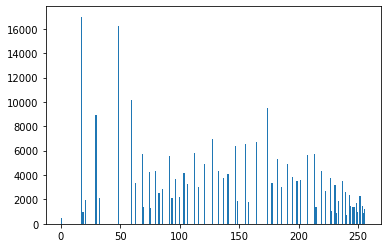

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('pollen.jpg',0)
plt.imshow(img, cmap='gray')
plt.show()

plt.hist(img.ravel(),256,[0,256])
plt.plot()
plt.show()

img_equalize = cv.equalizeHist(img)
plt.imshow(img_equalize, cmap='gray')
plt.show()

plt.hist(img_equalize.ravel(),256,[0,256])
plt.plot()
plt.show()


### Questão 3

##### (a) Carregue a imagem "ckt.tif" e obtenha as imagens gx e gy, contendo os gradientes nas direções x e y, respectivamente, usando filtragem no domínio espacial. Salve os resultados.

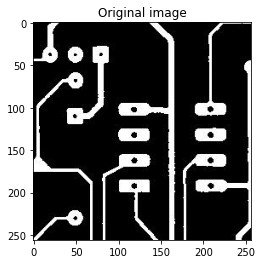

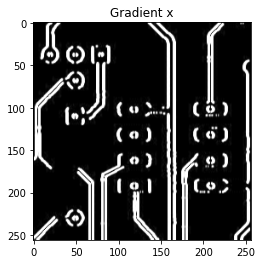

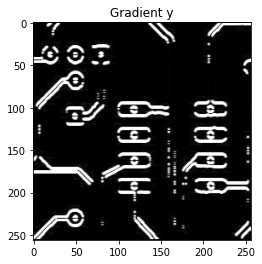

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('ckt2.png')

imgWith_filter = cv2.GaussianBlur(img, (3, 3), 0)

gray_img = cv2.cvtColor(imgWith_filter, cv2.COLOR_BGR2GRAY)

gx = cv2.Sobel(gray_img, cv2.CV_16S, 1, 0, 3)
gy = cv2.Sobel(gray_img, cv2.CV_16S, 0, 1, 3)

abs_gx = cv2.convertScaleAbs(gx)
abs_gy = cv2.convertScaleAbs(gy)

plt.imshow(img)
plt.title("Original image")
plt.show()
plt.imshow(cv2.cvtColor(abs_gx, cv2.COLOR_GRAY2BGR))
plt.title("Gradient x")
plt.show()

plt.imshow(cv2.cvtColor(abs_gy, cv2.COLOR_GRAY2BGR))
plt.title("Gradient y")
plt.show()



##### (b) Obtenha uma terceira imagem 'g' que é a aproximação do gradiente dada por g = |gx| + |gy|. Salve o resultado.

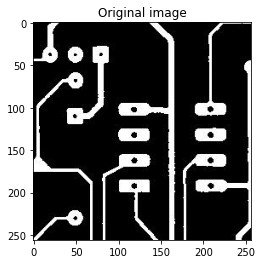

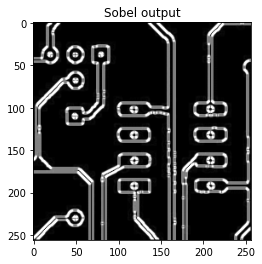

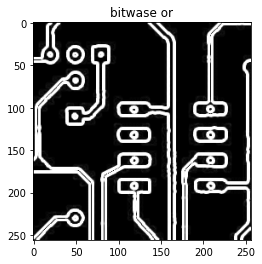

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('ckt2.png')

imgWith_filter = cv2.GaussianBlur(img, (3, 3), 0)

gray_img = cv2.cvtColor(imgWith_filter, cv2.COLOR_BGR2GRAY)

gx = cv2.Sobel(gray_img, cv2.CV_16S, 1, 0, 3)
gy = cv2.Sobel(gray_img, cv2.CV_16S, 0, 1, 3)

abs_gx = cv2.convertScaleAbs(gx)
abs_gy = cv2.convertScaleAbs(gy)

sobel_image = cv2.addWeighted(abs_gx, 0.5, abs_gy, 0.5, 0)

plt.imshow(img)
plt.title("Original image")
plt.show()

img_x = cv2.cvtColor(abs_gx, cv2.COLOR_GRAY2BGR)
img_y = cv2.cvtColor(abs_gy, cv2.COLOR_GRAY2BGR)

plt.imshow(cv2.cvtColor(sobel_image, cv2.COLOR_GRAY2BGR))
plt.title("Sobel output")
plt.show()

bitwase = cv2.bitwise_or(img_x, img_y)
plt.imshow(bitwase)
plt.title("bitwase or")
plt.show()


##### (c) Obtenha a imagem binária 'b' que contenha o valor '1' nas coordenadas dos pixels de g que são maiores ou iguais a 60 e zero caso contrário. Salve o resultado.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('ckt2.png')

imgWith_filter = cv2.GaussianBlur(img, (3, 3), 0)

gray_img = cv2.cvtColor(imgWith_filter, cv2.COLOR_BGR2GRAY)

gx = cv2.Sobel(gray_img, cv2.CV_16S, 1, 0, 3)
gy = cv2.Sobel(gray_img, cv2.CV_16S, 0, 1, 3)

abs_gx = cv2.convertScaleAbs(gx)
abs_gy = cv2.convertScaleAbs(gy)

img_x = cv2.cvtColor(abs_gx, cv2.COLOR_GRAY2BGR)
img_y = cv2.cvtColor(abs_gy, cv2.COLOR_GRAY2BGR)

bitwase = cv2.bitwise_or(img_x, img_y)
plt.imshow(bitwase)
plt.title("bitwase or")
plt.show()

mask = np.zeros(bitwase.shape[:2], dtype="uint8")
cv2.rectangle(mask, (60, 255), (255,60), 255, -1)
masked = cv2.bitwise_and(bitwase, bitwase, mask=mask)
cv2.imshow("Circular Mask", mask)
cv2.imshow("Mask Applied to Image", masked)
cv2.waitKey(0)

##### (d) Em que tipo de aplicação essa abordagem poderia ser útil?

### Questão 4

##### Filtragem no domínio da frequência:
Carregue a imagem "lena_noise.png" e aplique uma filtragem no domínio da frequência para atenuar todos os ruídos periódicos presentes na imagem. Salve o resultado.


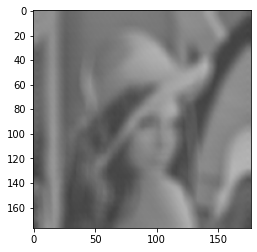

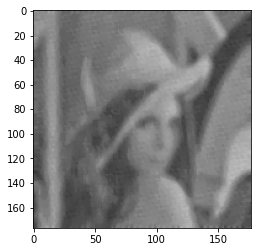

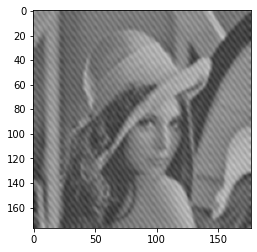

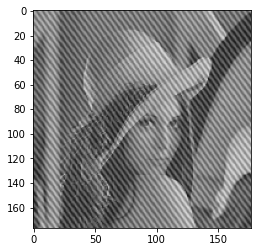

In [ ]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

img = cv2.imread('lena_noisy.png')

blur = cv.blur(img,(10,10))
plt.imshow(blur)
plt.show()

median = cv2.medianBlur(img,5)
plt.imshow(median)
plt.show()

gaussian = cv2.GaussianBlur(img,(5,5),0)
plt.imshow(gaussian)
plt.show()

bilateral = cv2.bilateralFilter(img, 15, 90,90)
plt.imshow(bilateral)
plt.show()